# Slurping through the Nuclear Soup: A CMS Dielectrons Analysis Journey

---

## Table of Content
- [Data Cleaning & Exploration Analysis](#data)
- [Exploring the Quantities](#explore)
- [Source Interactions Histogram](#source)
- [Event Categorization Upon Interaction Type](#event)
- [Seeking for Source Events Benchmarks From the Difference in ee Characteristics](#seek)
- [The Histogram of Each Resonant Particle](#histo)
    - [Z Boson Mass](#z)
    - [Y meson mass](#y)
    - [$J/\Psi$ meson mass](#j)
- [Source Events Dominance in Regions](#dominance)
- [Barrel & Endcap mass resolution](#region)
    - [Barrel Detector Resolution](#rres)
    - [Endcaps Detector Mass Resolution](#eres)
- [Using Machine Learning to Classify Dielectron Events](#ML)
    - [Using Logistic Regression Model](#LR)
    - [Using Decision Tree](#DT)
    - [Using Support Vector Machine](#SVM)
    - [Comparing the models with the real data visually](#comp)
- [Evaluating the models using other dataset](#field)

# Data Cleaning and Data Exploration Analysis<a id="data"></a>
---

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors # To have annotation over hoverinng mouse
import scipy.stats as stats # For statistical analysis
from scipy.optimize import curve_fit 
from scipy.stats import boxcox

In [5]:
# Reading the data as Pandas DataFrame:
data = pd.read_csv(r'dielectron.csv')
data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [6]:
# To get the overall shape of the data:
data.shape

(100000, 19)

In [7]:
# Finding the percentage of nulls:
data.isna().sum()/data.shape[0]*100

Run      0.000
Event    0.000
E1       0.000
px1      0.000
py1      0.000
pz1      0.000
pt1      0.000
eta1     0.000
phi1     0.000
Q1       0.000
E2       0.000
px2      0.000
py2      0.000
pz2      0.000
pt2      0.000
eta2     0.000
phi2     0.000
Q2       0.000
M        0.085
dtype: float64

In [8]:
# Making sure the columns names do not have any spaces:
data.columns = data.columns.str.replace(' ', '')
data.keys()

Index(['Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'],
      dtype='object')

In [9]:
# Viewing the nulls for the potential replacement:
data[data.M.isnull()]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
2354,147115,626787667,2.552450,0.783675,-2.42902,-0.026877,2.552310,-0.010530,-1.25871,1,14.27670,4.387350,-13.58510,-0.142737,14.27600,-0.009998,-1.258420,-1,NaN
4428,147115,222901013,2.537850,-1.024290,-1.94845,-1.262950,2.201280,-0.546171,-2.05479,1,22.00250,-8.881480,-16.89470,-10.945300,19.08690,-0.545920,-2.054790,-1,NaN
5035,147115,251148678,2.914610,1.578570,2.33753,0.734179,2.820620,0.257437,0.97683,-1,16.58530,8.977390,13.30470,4.178960,16.05020,0.257513,0.977215,1,NaN
6066,146644,908463569,19.896200,-11.256100,12.47620,-10.653800,16.803400,-0.597779,2.30483,-1,2.41704,-1.366660,1.51671,-1.293790,2.04161,-0.597517,2.304200,1,NaN
6667,146644,588243059,3.610600,-1.635780,-2.64885,-1.828730,3.113230,-0.557996,-2.12402,1,26.11550,-11.836800,-19.16480,-13.214400,22.52550,-0.557335,-2.124080,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95396,149182,227768088,0.994475,0.358496,-0.56898,-0.732614,0.672501,-0.943190,-1.00856,1,37.43420,13.518500,-21.38920,-27.587500,25.30310,-0.943794,-1.007160,-1,NaN
96087,149182,233450553,4.573870,-3.415140,2.97767,0.624910,4.530980,0.137486,2.42452,1,18.09420,-13.515300,11.77250,2.478260,17.92370,0.137831,2.425000,-1,NaN
96394,149182,99636450,12.192400,0.074398,-11.73300,3.314690,11.733200,0.278877,-1.56446,-1,6.01043,0.038936,-5.78425,1.632860,5.78438,0.278666,-1.564060,1,NaN
97996,146511,240272111,5.165580,-4.391900,-1.96237,1.882430,4.810370,0.381970,-2.72139,-1,13.72540,-11.669700,-5.21431,5.001750,12.78160,0.381967,-2.721380,1,NaN


In [10]:
# Calculating the missing M values
M = np.sqrt((data.E1 + data.E2)**2 -((data.px1 + data.px2)**2+(data.py1 + data.py2)**2+(data.pz1 + data.pz2)**2))
data.M.fillna(M);

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
# Checking the results:
data.isna().sum()/data.shape[0]*100 

Run      0.000
Event    0.000
E1       0.000
px1      0.000
py1      0.000
pz1      0.000
pt1      0.000
eta1     0.000
phi1     0.000
Q1       0.000
E2       0.000
px2      0.000
py2      0.000
pz2      0.000
pt2      0.000
eta2     0.000
phi2     0.000
Q2       0.000
M        0.085
dtype: float64

Which means that the momentum is greater than E. Therefore, the removal of nulls is the best choice!

In [13]:
# Removing the nulls from data
data.dropna(inplace=True)

In [14]:
# Double checking:
data.isna().sum() 

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

Nice!

In [16]:
# Finding the different runs provided in the data
run = pd.Series(data['Run'].unique())
run

0     147115
1     146644
2     149181
3     147114
4     149011
5     148031
6     147754
7     147929
8     148029
9     147926
10    146944
11    149182
12    146511
dtype: int64

In [17]:
# Exploring the optimization:
print('The max eta1', data['pt1'].max())
print('The min eta1', data['pt2'].min())
print('The max eta2', data['eta2'].abs().max())
print('The min eta2', data['eta2'].abs().min())
print('The max phi1', data['phi1'].abs().max())
print('The min phi1', data['phi1'].abs().min())
print('The max phi2', data['phi2'].abs().max())
print('The min phi2', data['phi2'].abs().min())
print('The max M', data['M'].abs().max())
print('The min M', data['M'].abs().min())
print('The max E1', data['E1'].max())
print('The min E1', data['E1'].min())
print('The max E2', data['E2'].max())
print('The min E2', data['E2'].min())

The max eta1 265.578
The min eta1 0.0266508
The max eta2 7.06479
The min eta2 1.47366e-05
The max phi1 3.14158
The min phi1 7.70284e-05
The max phi2 3.14158
The min phi2 2.07457e-05
The max M 109.999
The min M 2.00008
The max E1 850.602
The min E1 0.377928
The max E2 948.375
The min E2 0.4725


Segmenting the data into Barrel/Endcaps regions

In [19]:
# Low psuedorapidity region (Endcaps)--> Eta < 1.48 (More transverse)
# Hight psuedorapidity region(Barrel) --> Eta > 1.5 (Less transverse)

<figure> 
<center><img src="trackers.gif" width = "60%"></center>
<center><figcaption>Figure 1: The CMS detector regions with the psuedorapidity.</figcaption></center>
</figure>

In [21]:
# Definig the categorical functions that will be used:

# returns the category of the enteraction based on the potential source event:
def categories_of_enteractions(df): 

    if (df['M'] >= np.exp(1)) & (df['M'] <= np.exp(1.257)):
        return '$J/\Psi$'
    elif (df['M'] > np.exp(2.150)) & (df['M'] <= np.exp(2.4)):
        return 'Y'
    elif (df['M'] > np.exp(4.422)) & (df['M'] <= np.exp(4.605)):
        return 'Z'
    else:
        return 'DY & BG'

# returns the part of the detector where the ee where detected:
def categories_of_cms_part(df):
    if ((df['eta1'] > 1.497) & (df['eta2'] > 1.497)) | ((df['eta1'] < -1.497) & (df['eta2'] < -1.497)):
        return 'Barrel'
    elif ((df['eta1'] < 1.497) & (df['eta2'] < 1.497)) | ((df['eta1'] > -1.497) & (df['eta2'] > -1.497)):
        return 'Endcaps'
    else:
        return 'Both'

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\4112738047.py:7: SyntaxWarning: invalid escape sequence '\P'
  return '$J/\Psi$'


In [22]:
# Adding new columns to the data:

data['interaction'] = data.apply(categories_of_enteractions, axis = 1) # potential source interaction
data['region'] = data.apply(categories_of_cms_part, axis = 1) # region of detection
data['pt_diff'] = np.sqrt((data['py2'] - data['py1'])**2 + (data['px2'] - data['px1'])**2) # difference in momentum of e1 and e2
data['eta_diff'] = (data['eta2'] - data['eta1']).abs() # difference in eta of e1 and e2
data['phi_diff'] = (data['phi2'] - data['phi1']).abs() # difference in phi of e1 and e2

In [23]:
data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,pt2,eta2,phi2,Q2,M,interaction,region,pt_diff,eta_diff,phi_diff
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,...,2.14537,-2.344030,-2.072810,-1,8.94841,Y,Barrel,13.909525,0.141360,4.250470
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,...,12.75360,0.808077,2.734920,1,15.89300,DY & BG,Endcaps,9.423926,1.836497,5.737760
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,...,2.69667,-2.455080,2.148570,1,38.38770,DY & BG,Endcaps,10.010458,3.875560,0.817030
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,...,4.84272,2.330210,0.565865,-1,3.72862,DY & BG,Barrel,9.901647,0.111830,0.441345
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,...,2.44145,-2.423700,-1.684810,-1,2.74718,$J/\Psi$,Barrel,12.617686,0.329950,0.313270


In [24]:
# Categorizing the Events According to their Dielectrons Charge:
elec_elec = data[(data['Q1'] == -1) & (data['Q2'] == -1)]
elec_pos = data[((data['Q1'] == -1) & (data['Q2'] == 1)) | ((data['Q1'] == 1) & (data['Q2'] == -1))] #----- These are the events of interest!
pos_pos = data[(data['Q1'] == 1) & (data['Q2'] == 1)]

In [25]:
# As seen from the 2D histograms, the data is almost up to +/-2.5 eta (the rest are outliers)!
# Hence:
elec_pos = elec_pos[(elec_pos['eta1'].abs() < 2.5) & (elec_pos['eta2'].abs() < 2.5)]

In [26]:
elec_pos.to_csv("elec_pos.csv", index = False)

### Exploring the quantities<a id="explore"></a>

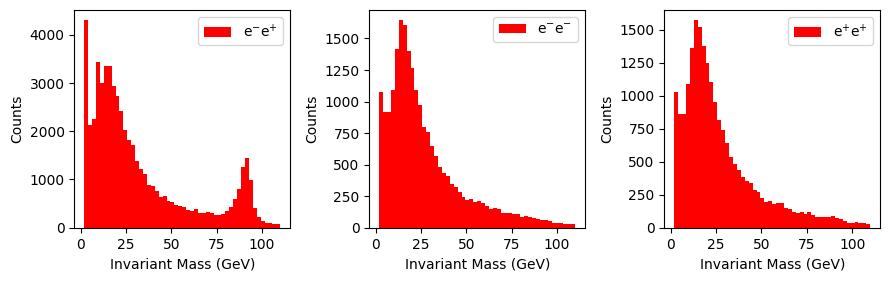

<Figure size 640x480 with 0 Axes>

In [28]:
#Invariant mass:

plt.figure(figsize = (9,8))

plt.subplot(3,3,1)
plt.hist(elec_pos['M'], bins = 50, color = 'red', alpha = 1, label ='e$^{-}$e$^{+}$');
plt.ylabel('Counts');
plt.xlabel('Invariant Mass (GeV)');
plt.tight_layout()
plt.legend()

plt.subplot(3,3,2)
plt.hist(elec_elec['M'], bins = 50, color = 'red', alpha = 1, label ='e$^{-}$e$^{-}$' );
plt.ylabel('Counts');
plt.xlabel('Invariant Mass (GeV)');
plt.tight_layout()
plt.legend()

plt.subplot(3,3,3)
plt.hist(pos_pos['M'], bins = 50, color = 'red', alpha = 1, label ='e$^{+}$e$^{+}$');
plt.ylabel('Counts');
plt.xlabel('Invariant Mass (GeV)');
plt.tight_layout()
plt.legend()
plt.show()
plt.tight_layout()

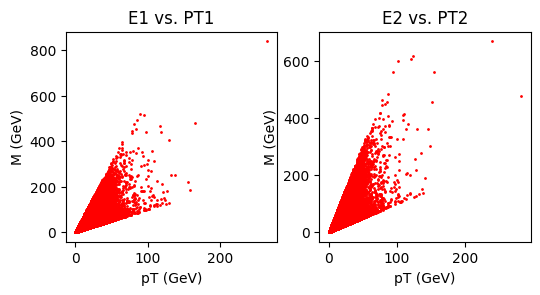

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)
plt.scatter(elec_pos.pt1, elec_pos.E1, s = 1, color = 'red')
plt.title('E1 vs. PT1')
plt.xlabel('pT (GeV)')
plt.ylabel('M (GeV)')
plt.subplot(2,2,2)
plt.scatter(elec_pos.pt2, elec_pos.E2, s = 1, color = 'red')
plt.title('E2 vs. PT2')
plt.xlabel('pT (GeV)')
plt.ylabel('M (GeV)')
plt.show()
plt.tight_layout()

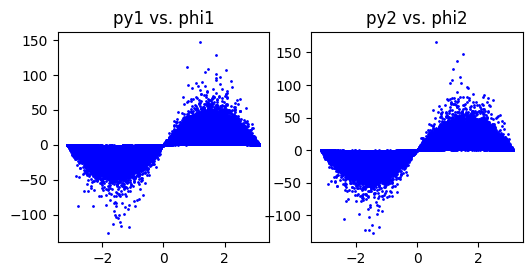

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)
plt.scatter(elec_pos.phi1, elec_pos.py1, s = 1, color = 'blue')
plt.title('py1 vs. phi1')
#plt.xlabel('pT (GeV)')
#plt.ylabel('M (GeV)')
plt.subplot(2,2,2)
plt.scatter(elec_pos.phi2, elec_pos.py2, s = 1, color = 'blue')
plt.title('py2 vs. phi2')
#plt.xlabel('pT (GeV)')
#plt.ylabel('M (GeV)')
plt.show()
plt.tight_layout()

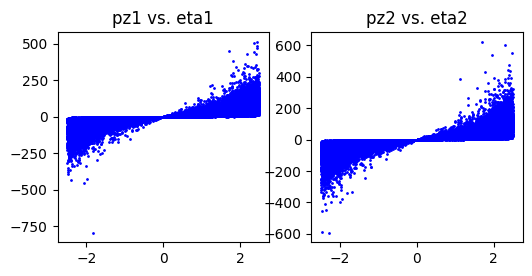

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)
plt.scatter(elec_pos.eta1, elec_pos.pz1, s = 1, color = 'blue')
plt.title('pz1 vs. eta1')
#plt.xlabel('pT (GeV)')
#plt.ylabel('M (GeV)')
plt.subplot(2,2,2)
plt.scatter(elec_pos.eta2, elec_pos.pz2, s = 1, color = 'blue')
plt.title('pz2 vs. eta2')
#plt.xlabel('pT (GeV)')
#plt.ylabel('M (GeV)')
plt.show()
plt.tight_layout()

# Main Data Analysis

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\3582682507.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\eta$")
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\3582682507.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("$\phi$")


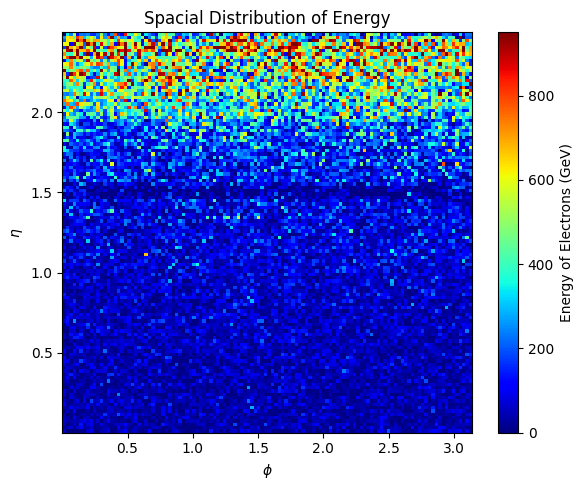

In [33]:
# To find the ee energy distribution in the detector:
plt.figure(figsize = (6,5))
plt.hist2d(elec_pos['phi2'].abs(), elec_pos['eta2'].abs(), bins=120, weights=elec_pos['E2'], cmap='jet', vmin=0, vmax=950);
plt.colorbar().set_label('Energy of Electrons (GeV)')
plt.ylabel("$\eta$")
plt.xlabel("$\phi$")
plt.title("Spacial Distribution of Energy")

plt.tight_layout()

### Source Interactions Histogram<a id="source"></a>

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\1668849399.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log(M)$')
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\1668849399.py:16: SyntaxWarning: invalid escape sequence '\P'
  plt.text(1.01,665,'$J/\Psi$', fontsize = 12, color = 'black')


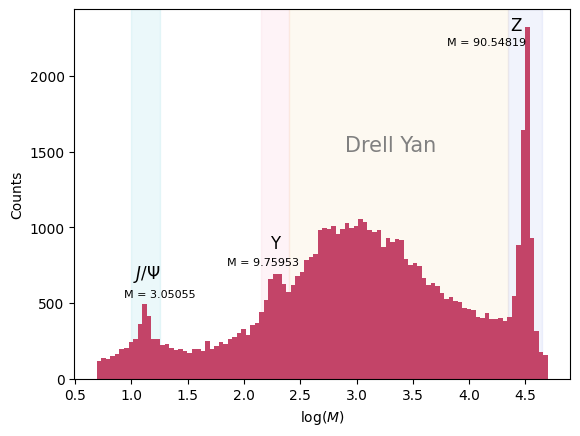

In [35]:
# To open Interactive Window
#%matplotlib qt 

#To open Inline Window
%matplotlib inline 

plt.xlabel('$\log(M)$')
plt.ylabel('Counts')

# Invariant Mass Location
plt.text(0.93,540,'M = 3.05055', fontsize = 8, color = 'black')
plt.text(1.85,750,'M = 9.75953', fontsize = 8, color = 'black')
plt.text(3.8,2200,'M = 90.54819', fontsize = 8, color = 'black')

# Particle Name Location
plt.text(1.01,665,'$J/\Psi$', fontsize = 12, color = 'black')
plt.text(2.23,860,'Y', fontsize = 12, color = 'black')
plt.text(4.37,2300,'Z', fontsize = 12, color = 'black')
plt.text(2.9,1500,'Drell Yan', fontsize = 15, color = 'gray')

# Highlights
plt.axvspan(1, 1.25, alpha = 0.1, color = '#3EC1D3')
plt.axvspan(2.15, 2.4, alpha = 0.1, color = '#F78FB3')
plt.axvspan(2.4, 4.35, alpha = 0.1, color = '#F5CD7A')
plt.axvspan(4.35, 4.65, alpha = 0.1, color = '#778BEB')

plt.hist(np.log(elec_pos['M']), bins = 100, color = '#C34468'); #darkslategrey
mplcursors.cursor(hover=True); # To get the information while hovering over the histogram

plt.savefig("M_spectrum.png")

plt.show()

### Event Categorization Upon Interaction Type (Descriptive)<a id="event"></a>

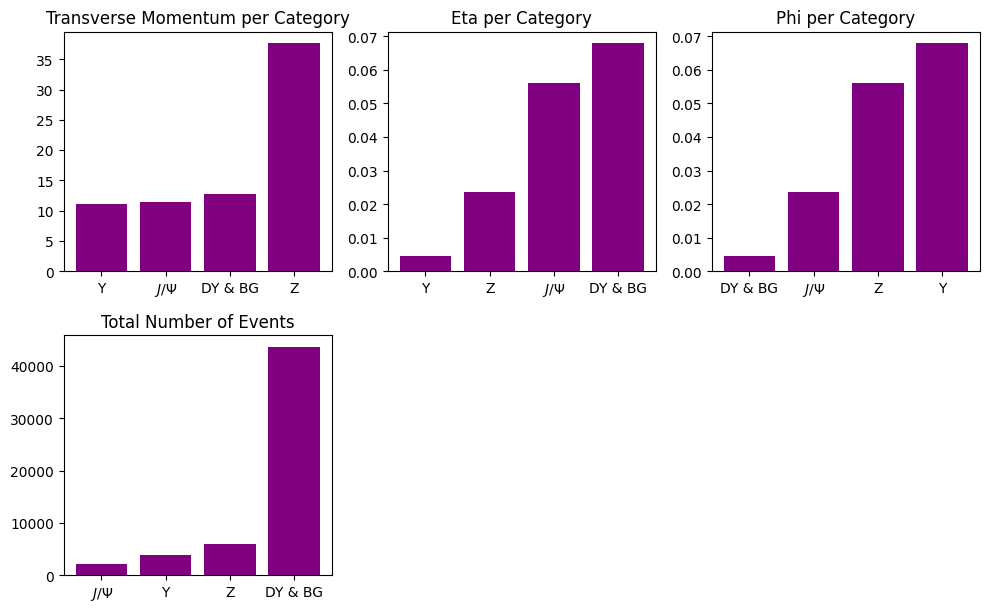

In [37]:
plt.figure(figsize = (10,9))

mean_pt = elec_pos.groupby(['interaction'])['pt1'].median().sort_values()

plt.subplot(3,3,1) # this is showing that large T-momentum corresponds to important events!
plt.bar(x = mean_pt.index, height = mean_pt, color = 'purple') 
plt.title('Transverse Momentum per Category')

mean_eta = elec_pos.groupby(['interaction'])['eta1'].median().abs().sort_values()

plt.subplot(3,3,2) # this is showing that small eta correspond to important events! 
plt.bar(x = mean_eta.index, height = mean_eta, color = 'purple') 
plt.title('Eta per Category')

mean_phi = elec_pos.groupby(['interaction'])['phi1'].median().abs().sort_values()

plt.subplot(3,3,3) 
plt.bar(x = mean_phi.index, height = mean_eta, color = 'purple') 
plt.title('Phi per Category')

events_count = elec_pos.groupby(['interaction'])['Event'].count().sort_values()

plt.subplot(3,3,4) 
plt.bar(x = events_count.index, height = events_count, color = 'purple') 
plt.title('Total Number of Events')

plt.tight_layout()
plt.show()

### Seeking for Source Events Benchmarks From the Difference in ee Characteristics (Descriptive)<a id="seek"></a>

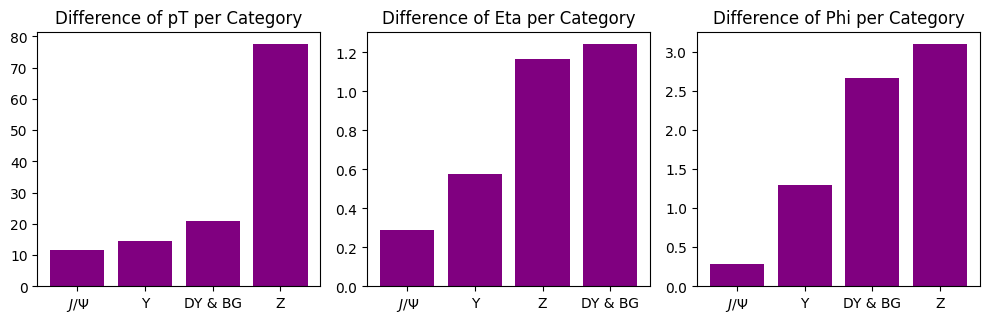

In [39]:
plt.figure(figsize = (10,9))

mean_pt_diff = elec_pos.groupby(['interaction'])['pt_diff'].median().sort_values()

plt.subplot(3,3,1) 
plt.bar(x = mean_pt_diff.index, height = mean_pt_diff, color = 'purple')  
plt.title('Difference of pT per Category')

mean_eta_diff = elec_pos.groupby(['interaction'])['eta_diff'].median().sort_values()

plt.subplot(3,3,2) 
plt.bar(x = mean_eta_diff.index, height = mean_eta_diff, color = 'purple')  
plt.title('Difference of Eta per Category')

mean_phi_diff = elec_pos.groupby(['interaction'])['phi_diff'].median().sort_values()

plt.subplot(3,3,3) 
plt.bar(x = mean_phi_diff.index, height = mean_phi_diff, color = 'purple') 
plt.title('Difference of Phi per Category')

plt.tight_layout()
plt.show()

### The Histogram of Each Resonant Particle<a id="histo"></a>

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\447966176.py:8: SyntaxWarning: invalid escape sequence '\P'
  elec_pos[elec_pos['interaction'] == '$J/\Psi$']['M'].plot(kind = 'hist', bins = 130, color = '#C34468')
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\447966176.py:9: SyntaxWarning: invalid escape sequence '\P'
  plt.title('$J/\Psi$ Meson')


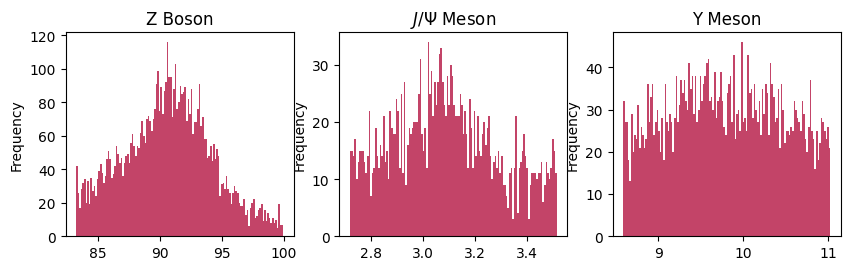

In [41]:
plt.figure(figsize=(10,9))

plt.subplot(3,3,1)
elec_pos[elec_pos['interaction'] == 'Z']['M'].plot(kind = 'hist', bins = 130, color = '#C34468')
plt.title('Z Boson')

plt.subplot(3,3,2)
elec_pos[elec_pos['interaction'] == '$J/\Psi$']['M'].plot(kind = 'hist', bins = 130, color = '#C34468')
plt.title('$J/\Psi$ Meson')

plt.subplot(3,3,3)
elec_pos[elec_pos['interaction'] == 'Y']['M'].plot(kind = 'hist', bins = 130, color = '#C34468')
plt.title('Y Meson')

plt.show()

#### Z Boson Mass<a id="z"></a>

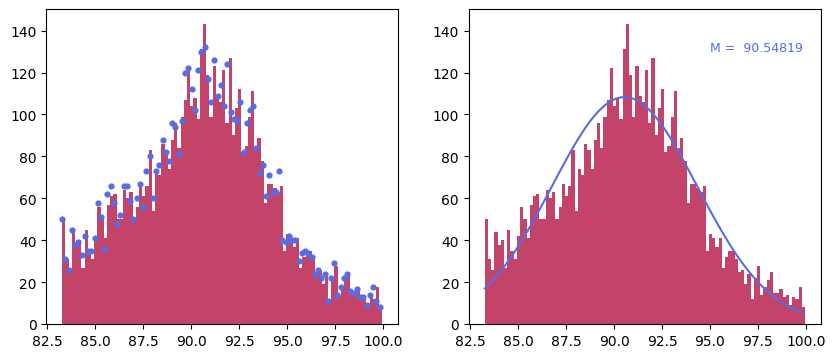

In [43]:
start_limit = np.exp(4.422)
end_limit = np.exp(4.605)

M = pd.Series(elec_pos[elec_pos['interaction'] == 'Z']['M']) # Updating M with the transformed data

# Creating the Gaussian fitting function:
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) 

# Binning the histogram and its values to use them in the gaussian fitting:
bins = np.linspace(start_limit, end_limit, 100)
freq = []
for i in range(len(bins[:-1])):
    condition = ((M >= bins[i]) & (M < bins[i+1]))
    freq.append(M[condition].count()) 
    
x = bins[:-1] # It is more convenient to name it x

plt.figure(figsize = (10,9))

# Making sure the binning is performed correctly:
plt.subplot(2,2,1)
plt.hist(M, bins = 100, color = '#C34468')
plt.scatter(x = x, y = freq, s = 12, color =  '#556EE6')

# Initial guess for the parameters: [amplitude, center, width] -to avoid overfitting
initial_guess = [1.0, np.mean(x), np.std(x)]

# Fit the curve
parameter, pcov = curve_fit(gaussian, x, freq, p0=initial_guess)

# Gives the function with the fitting parameters:
fitted = gaussian(x,parameter[0], parameter[1], parameter[2])

# Plotting the histogram together with the Gaussian Fitting
plt.subplot(2,2,2)
plt.hist(M, bins = 100, color = '#C34468')
plt.plot(x, fitted, c = '#556EE6')
plt.text(95,130,f'M = {parameter[1]: .5f}', fontsize = 9, color = '#556EE6')

plt.savefig("M_Z.png")

plt.show()

#### Y meson mass<a id="y"></a>

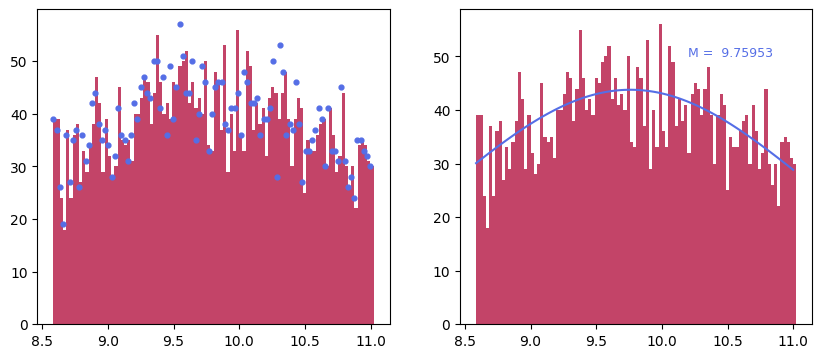

In [45]:
start_limit = np.exp(2.150)
end_limit = np.exp(2.4)

M = pd.Series(elec_pos[elec_pos['interaction'] == 'Y']['M']) # Updating M with the transformed data

# Creating the Gaussian fitting function:
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) 

# Binning the histogram and its values to use them in the gaussian fitting:
bins = np.linspace(start_limit, end_limit, 100)
freq = []
for i in range(len(bins[:-1])):
    condition = ((M >= bins[i]) & (M < bins[i+1]))
    freq.append(M[condition].count()) 
    
x = bins[:-1] # It is more convenient to name it x

plt.figure(figsize = (10,9))

# Making sure the binning is performed correctly:
plt.subplot(2,2,1)
plt.hist(M, bins = 100, color = '#C34468')
plt.scatter(x = x, y = freq, s = 12, color =  '#556EE6')

# Initial guess for the parameters: [amplitude, center, width] -to avoid overfitting
initial_guess = [1.0, np.mean(x), np.std(x)]

# Fit the curve
parameter, pcov = curve_fit(gaussian, x, freq, p0=initial_guess)

# Gives the function with the fitting parameters:
fitted = gaussian(x,parameter[0], parameter[1], parameter[2])

# Plotting the histogram together with the Gaussian Fitting
plt.subplot(2,2,2)
plt.hist(M, bins = 100, color = '#C34468')
plt.plot(x, fitted, c = '#556EE6')
plt.text(10.2,50,f'M = {parameter[1]: .5f}', fontsize = 9, color = '#556EE6')

plt.savefig("M_Y.png")

plt.show()

#### $J/\Psi$ meson mass<a id="j"></a>

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\4030271765.py:4: SyntaxWarning: invalid escape sequence '\P'
  M = pd.Series(elec_pos[elec_pos['interaction'] == '$J/\Psi$']['M']) # Updating M with the transformed data


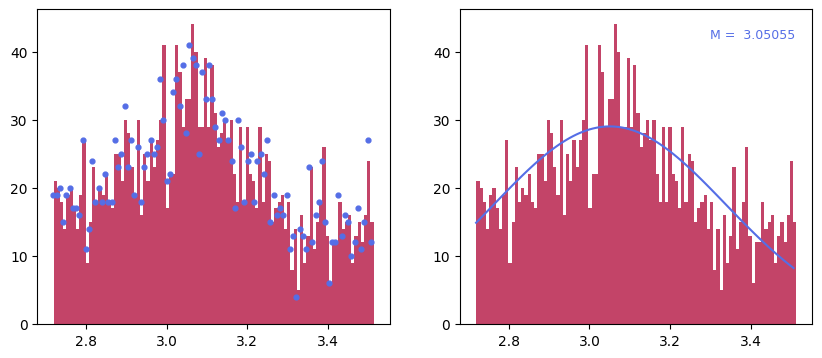

In [47]:
start_limit = np.exp(1)
end_limit = np.exp(1.257)

M = pd.Series(elec_pos[elec_pos['interaction'] == '$J/\Psi$']['M']) # Updating M with the transformed data

# Creating the Gaussian fitting function:
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) 

# Binning the histogram and its values to use them in the gaussian fitting:
bins = np.linspace(start_limit, end_limit, 100)
freq = []
for i in range(len(bins[:-1])):
    condition = ((M >= bins[i]) & (M < bins[i+1]))
    freq.append(M[condition].count()) 
    
x = bins[:-1] # It is more convenient to name it x

plt.figure(figsize = (10,9))

# Making sure the binning is performed correctly:
plt.subplot(2,2,1)
plt.hist(M, bins = 100, color = '#C34468')
plt.scatter(x = x, y = freq, s = 12, color =  '#556EE6')

# Getting the fitting parameters:
parameter, pcov = curve_fit(gaussian, x, freq) # curve_fit(the fitting func., x_values, y_values)

# Gives the function with the fitting parameters:
fitted = gaussian(x,parameter[0], parameter[1], parameter[2])

# Plotting the histogram together with the Gaussian Fitting
plt.subplot(2,2,2)
plt.hist(M, bins = 100, color = '#C34468')
plt.plot(x, fitted, c = '#556EE6')
plt.text(3.3,42,f'M = {parameter[1]: .5f}', fontsize = 9, color = '#556EE6')

plt.savefig("M_Jpsi.png")

plt.show()

### Source Events Dominance in Regions (Descriptive)<a id="dominance"></a>

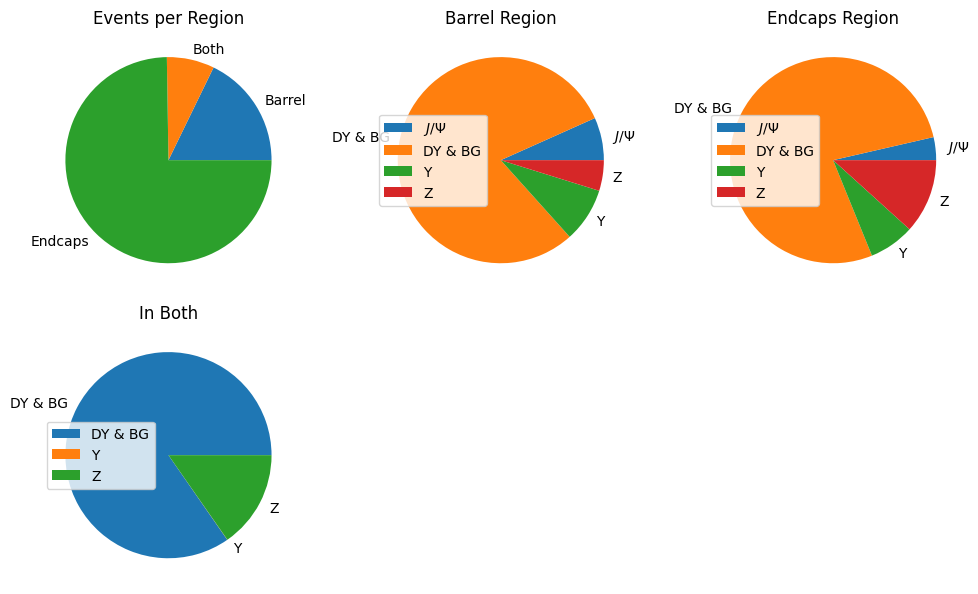

In [49]:
plt.figure(figsize = (10,9))

Total_events = elec_pos.groupby(['region'])['Event'].count()

plt.subplot(3,3,1) 
plt.pie(x = Total_events, labels = Total_events.index)  
plt.title('Events per Region')

Barrel = elec_pos[elec_pos['region'] == 'Barrel'].groupby(['interaction'])['Event'].count()

plt.subplot(3,3,2) 
plt.pie(x = Barrel, labels = Barrel.index)
plt.title('Barrel Region')
plt.legend(loc = 0)

Endcaps = elec_pos[elec_pos['region'] == 'Endcaps'].groupby(['interaction'])['Event'].count()

plt.subplot(3,3,3) 
plt.pie(x = Endcaps, labels = Endcaps.index)
plt.title('Endcaps Region')
plt.legend(loc = 0)

Both = elec_pos[elec_pos['region'] == 'Both'].groupby(['interaction'])['Event'].count()

plt.subplot(3,3,4) 
plt.pie(x = Both, labels = Both.index)
plt.title('In Both')
plt.legend(loc = 0)

plt.tight_layout()
plt.show()

# Barrel & Endcap mass resolution<a id="region"></a>
---

## Barrel Detector Mass Resolution<a id="rres"></a>

5953


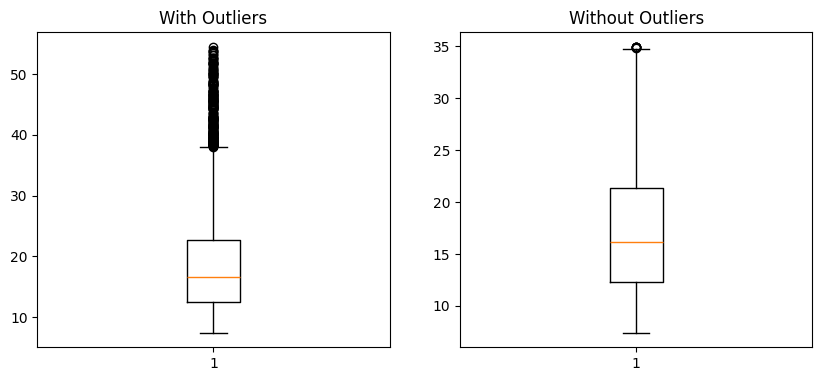

In [52]:
plt.figure(figsize = (10,9))

Barrel_mass = pd.concat([elec_elec, pos_pos], axis = 0)

condition_1 = (Barrel_mass['region'] == 'Barrel')
condition_2 = (Barrel_mass['M'] >= np.exp(2))
condition_3 = (Barrel_mass['M'] <= np.exp(4))

Barrel_mass = Barrel_mass[condition_1 & condition_2 & condition_3]['M']

# Investigating the outliers:
plt.subplot(2,2,1)
plt.boxplot(Barrel_mass);
plt.title('With Outliers')
mplcursors.cursor(hover=True);

# Removing the outliers:
max_boxplot = 35
M = pd.Series(Barrel_mass[Barrel_mass <= max_boxplot]) 

# just to make sure we have the same number of points for Barrel and Endcaps analysis
print(M.count()) 

# Modified histogram:
plt.subplot(2,2,2)
plt.boxplot(M);
plt.title('Without Outliers')
mplcursors.cursor(hover=True);

plt.show()

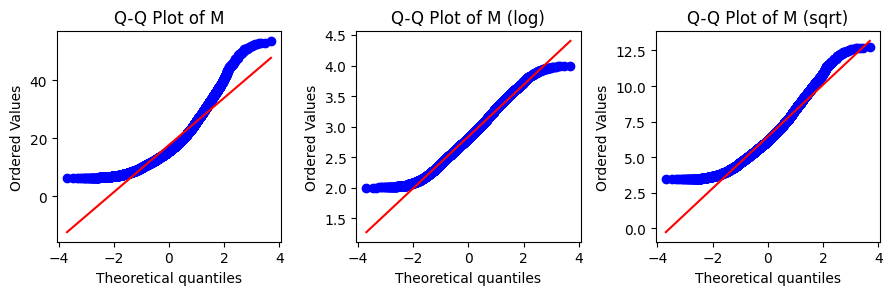

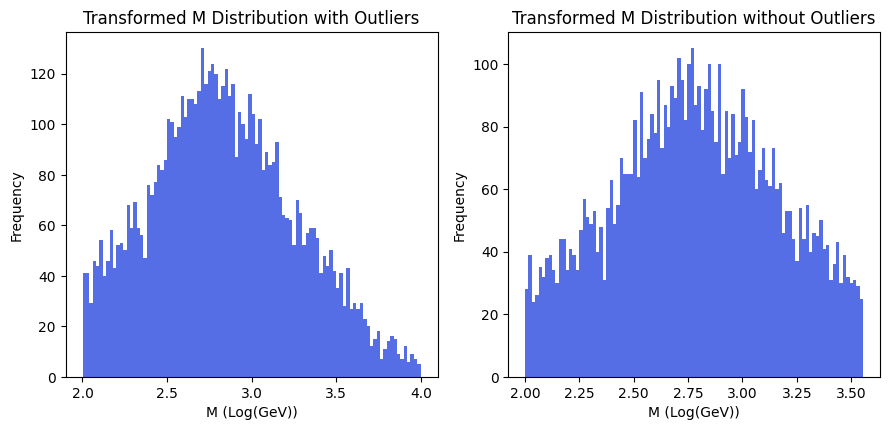

In [53]:
M = pd.Series(Barrel_mass)

# Creating Q-Q plots of transformed data:
plt.figure(figsize = (9,8))

plt.subplot(3,3,1)
quant, test = stats.probplot(boxcox(M,1),  plot=plt) # Original Data
plt.title("Q-Q Plot of M")

plt.subplot(3,3,2)
quant, test = stats.probplot(boxcox(M,0),  plot=plt) # Under Log Transformation
plt.title("Q-Q Plot of M (log)")

plt.subplot(3,3,3)
quant, test = stats.probplot(boxcox(M,0.5),  plot=plt) # Under Sqrt Transformation
plt.title("Q-Q Plot of M (sqrt)")

plt.tight_layout()

plt.figure(figsize = (9,8))

# Transformed data without the removal of outliers:
plt.subplot(2,2,1)
plt.hist(boxcox(M,0), bins = 100, color = '#556EE6') 
plt.xlabel('M (Log(GeV))')
plt.ylabel('Frequency')
plt.title("Transformed M Distribution with Outliers")

# Removing outliers from data:
M = pd.Series(Barrel_mass[(Barrel_mass <= max_boxplot)])

# Plotting the cleaned data
plt.subplot(2,2,2)
plt.hist(boxcox(M,0), bins = 100, color = '#556EE6');
plt.xlabel('M (Log(GeV))')
plt.ylabel('Frequency')
plt.title("Transformed M Distribution without Outliers")

plt.tight_layout()
plt.show()

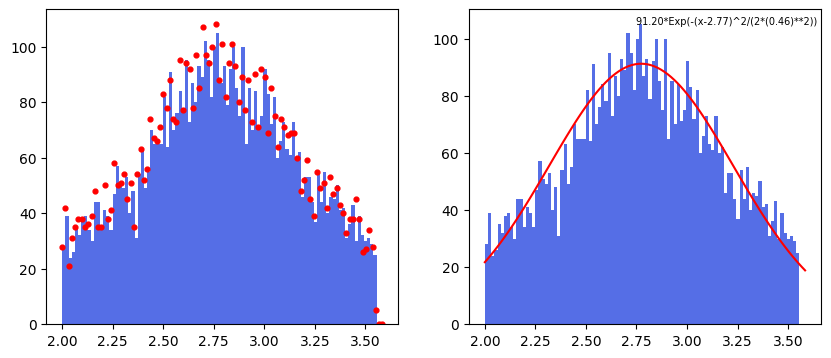

In [54]:
start_limit = 2
end_limit = 3.6
lamda = 0
M = pd.Series(boxcox(Barrel_mass[(Barrel_mass <= max_boxplot)], 0)) # Updating M with the transformed data

# Creating the Gaussian fitting function:
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) 

# Binning the histogram and its values to use them in the gaussian fitting:
bins = np.linspace(start_limit, end_limit, 100)
freq = []
for i in range(len(bins[:-1])):
    condition = ((M >= bins[i]) & (M < bins[i+1]))
    freq.append(M[condition].count()) 
    
x = bins[:-1] # It is more convenient to name it x

plt.figure(figsize = (10,9))

# Making sure the binning is performed correctly:
plt.subplot(2,2,1)
plt.hist(M, bins = 100, color = '#556EE6')
plt.scatter(x = x, y = freq, s = 12, color =  'red')

# Getting the fitting parameters:
parameter, pcov = curve_fit(gaussian, x, freq) # curve_fit(the fitting func., x_values, y_values)

# Gives the function with the fitting parameters:
fitted = gaussian(x,parameter[0], parameter[1], parameter[2])

# Plotting the histogram together with the Gaussian Fitting
plt.subplot(2,2,2)
plt.hist(M, bins = 100, color = '#556EE6')
plt.plot(x, fitted, c = 'r')
plt.text(2.75,105,f'{parameter[0]:.2f}*Exp(-(x-{parameter[1]:.2f})^2/(2*({parameter[2]:.2f})**2)) ', fontsize = 7, color = 'black')

plt.show()

In [55]:
if lamda != 0:
    reslution = (parameter[2]*lamda + 1)**(1/lamda)
else:
    reslution = np.exp(parameter[2])
print(reslution)

1.5786571279631587


## Endcaps Detector Mass Resolution<a id="eres"></a>

5953


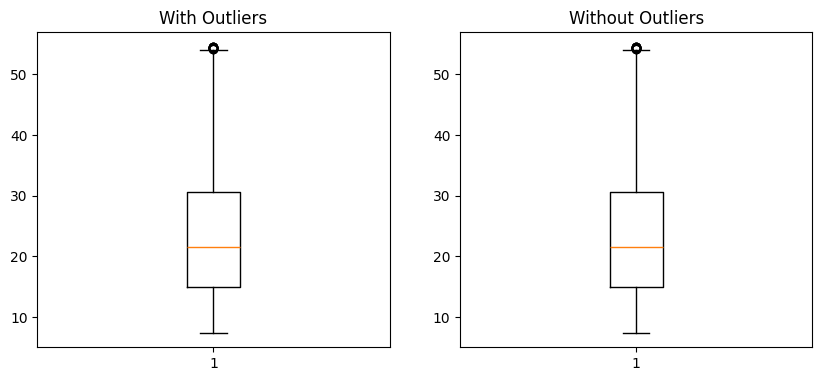

In [57]:
plt.figure(figsize = (10,9))

End_mass = pd.concat([elec_elec, pos_pos], axis = 0)

condition_1 = (End_mass['region'] == 'Endcaps')
condition_2 = (End_mass['M'] >= np.exp(2))
condition_3 = (End_mass['M'] <= np.exp(4))

End_mass = End_mass[condition_1 & condition_2 & condition_3]['M'][:5953]

# Investigating the outliers:
plt.subplot(2,2,1)
plt.boxplot(End_mass);
plt.title('With Outliers')
mplcursors.cursor(hover=True);

# Removing the outliers:
max_boxplot = 120
M = pd.Series(End_mass[(End_mass <= max_boxplot)]) 

# just to make sure we have the same number of points for Barrel and Endcaps analysis
print(M.count()) 

# Modified histogram:
plt.subplot(2,2,2)
plt.boxplot(M);
plt.title('Without Outliers')
mplcursors.cursor(hover=True);

plt.show()

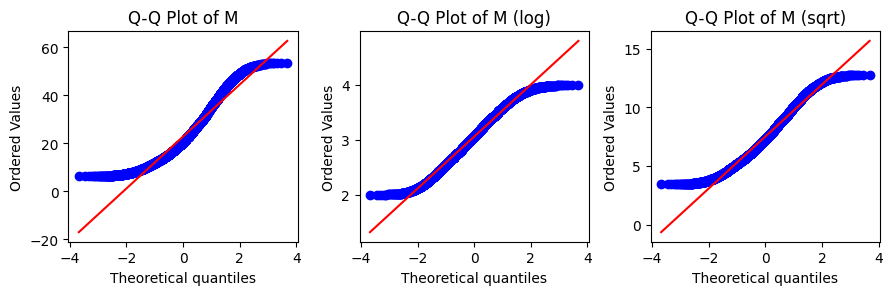

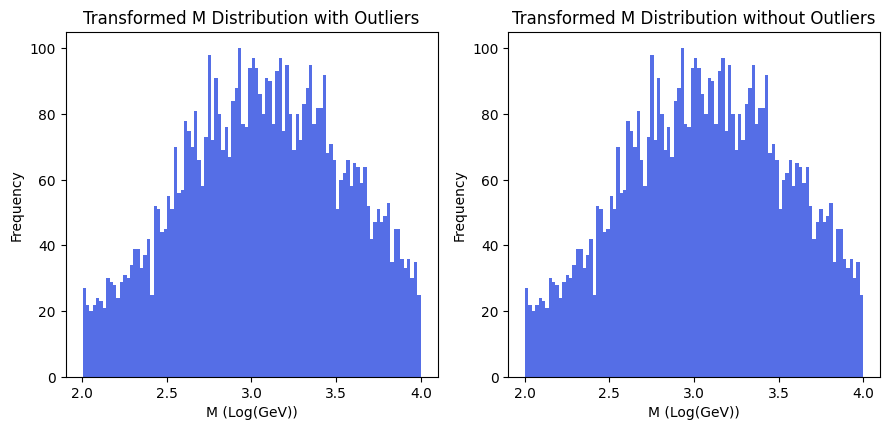

In [58]:
M = pd.Series(End_mass)

# Creating Q-Q plots of transformed data:
plt.figure(figsize = (9,8))

plt.subplot(3,3,1)
quant, test = stats.probplot(boxcox(M,1),  plot=plt) # Original Data
plt.title("Q-Q Plot of M")

plt.subplot(3,3,2)
quant, test = stats.probplot(boxcox(M,0),  plot=plt) # Under Log Transformation
plt.title("Q-Q Plot of M (log)")

plt.subplot(3,3,3)
quant, test = stats.probplot(boxcox(M,0.5),  plot=plt) # Under Sqrt Transformation
plt.title("Q-Q Plot of M (sqrt)")

plt.tight_layout()

plt.figure(figsize = (9,8))

# Transformed data without the removal of outliers:
plt.subplot(2,2,1)
plt.hist(boxcox(M,0), bins = 100, color = '#556EE6') 
plt.xlabel('M (Log(GeV))')
plt.ylabel('Frequency')
plt.title("Transformed M Distribution with Outliers")

# Removing outliers from data:
M = pd.Series(End_mass[(End_mass <= max_boxplot)])

# Plotting the cleaned data
plt.subplot(2,2,2)
plt.hist(boxcox(M,0), bins = 100, color = '#556EE6');
plt.xlabel('M (Log(GeV))')
plt.ylabel('Frequency')
plt.title("Transformed M Distribution without Outliers")

plt.tight_layout()
plt.show()

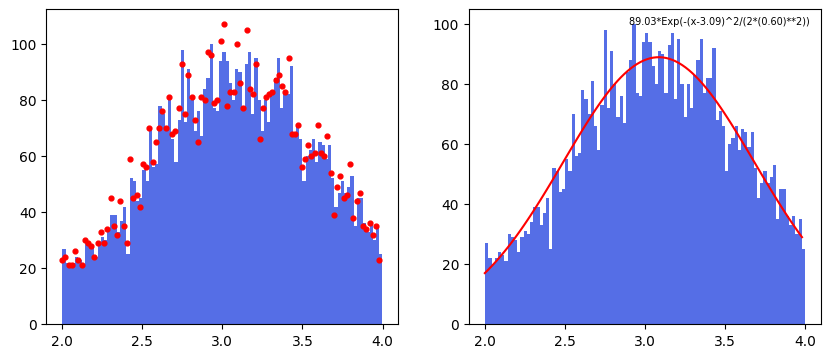

In [59]:
start_limit = 2
end_limit = 4
lamda = 0
M = pd.Series(boxcox(End_mass[(End_mass <= max_boxplot)], 0)) # Updating M with the transformed data

# Creating the Gaussian fitting function:
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) 

# Binning the histogram and its values to use them in the gaussian fitting:
bins = np.linspace(start_limit, end_limit, 100)
freq = []
for i in range(len(bins[:-1])):
    condition = ((M >= bins[i]) & (M < bins[i+1]))
    freq.append(M[condition].count()) 
    
x = bins[:-1] # It is more convenient to name it x

plt.figure(figsize = (10,9))

# Making sure the binning is performed correctly:
plt.subplot(2,2,1)
plt.hist(M, bins = 100, color = '#556EE6')
plt.scatter(x = x, y = freq, s = 12, color =  'red')

# Getting the fitting parameters:
parameter, pcov = curve_fit(gaussian, x, freq) # curve_fit(the fitting func., x_values, y_values)

# Gives the function with the fitting parameters:
fitted = gaussian(x,parameter[0], parameter[1], parameter[2])

# Plotting the histogram together with the Gaussian Fitting
plt.subplot(2,2,2)
plt.hist(M, bins = 100, color = '#556EE6')
plt.plot(x, fitted, c = 'r')
plt.text(2.9,100,f'{parameter[0]:.2f}*Exp(-(x-{parameter[1]:.2f})^2/(2*({parameter[2]:.2f})**2)) ', fontsize = 7, color = 'black')

plt.show()

In [60]:
if lamda != 0:
    reslution = (parameter[2]*lamda + 1)**(1/lamda)
else:
    reslution = np.exp(parameter[2])
print(reslution)

1.817131582538442


# Using Machine Learning to Classify Dielectron Events<a id="ML"></a>

The two models will then be tested with dimuons interactions to check their effeciency

## 1) Using Logistic Regression Model<a id="LR"></a>

In [64]:
# Imorting libraries used in both models:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [65]:
# Importing logistic regression library
from sklearn.linear_model import LogisticRegression

In [66]:
# Defining the features and target in our ML Model
features = ["pt1", "pt2", "E1", "E2", "eta1", "eta2"]
target = ['interaction']

# Initiating the encoder
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(elec_pos[target]) # Encoding target classes
X = elec_pos[features] 

# Just to check the naming of encoding:
print(encoder.classes_)

# Create the object:
scaler = StandardScaler()

# Transforming the data (Normalizing it):
X_norm = scaler.fit_transform(X)

# Splitting the data for testing and training (75% for training and 25% for testing):
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_encoded, random_state=123)

# Initialize the model:
lr = LogisticRegression(multi_class='ovr')

# Training the model:
lr.fit(X_train, y_train)

# Generating the prediction:
y_predict_LR = lr.predict(X_test)

['$J/\\Psi$' 'DY & BG' 'Y' 'Z']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
y_predict_LR

array([1, 3, 1, ..., 1, 1, 1])

In [68]:
# Evaluating our model:
accuracy = accuracy_score(y_test, y_predict_LR)
print(f' The accuracy of this model is : {accuracy: .2f}')

 The accuracy of this model is :  0.85


## 2) Using Decision Tree<a id="DT"></a>

In [70]:
# Importing Decision Tree library
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [71]:
# Defining the features and target in our ML Model
features = ["pt1", "pt2", "E1", "E2", "eta1", "eta2"]
target = ['interaction']

# Initiating the encoder
encoder = LabelEncoder()

X = elec_pos[features]
y_encoded = encoder.fit_transform(elec_pos[target]) # Encoding target classes

# Just to check the naming of encoding:
print(encoder.classes_)

# Create the object:
scaler = StandardScaler()

# Transforming the data (Normalizing it):
X_norm = scaler.fit_transform(X)

# Splitting the data for testing and training (75% for training and 25% for testing):
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_encoded, random_state=123, test_size = 0.25)

# Initializing the model:
DTC = DecisionTreeClassifier(ccp_alpha= 0.1)
onevsrest = OneVsRestClassifier(DTC)

# Training the model:
onevsrest = onevsrest.fit(X_train, y_train)

# Generating the prediction:
y_predict_DT = onevsrest.predict(X_test)

['$J/\\Psi$' 'DY & BG' 'Y' 'Z']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
y_predict_DT

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
accuracy = accuracy_score(y_test, y_predict_DT)
print(f' The accuracy of this model is : {accuracy: .2f}')

 The accuracy of this model is :  0.79


## 3) Using Support Vector Machine<a id="SVM"></a>

In [75]:
# Importing Support Vector Machine
from sklearn.svm import SVC 

In [76]:
# Defining the features and target in our ML Model
features = ["pt1", "pt2", "E1", "E2", "eta1", "eta2"]
target = ['interaction']

# Initiating the encoder
encoder = LabelEncoder()

X = elec_pos[features]
y_encoded = np.array(encoder.fit_transform(elec_pos[target])) # Encoding target classes

# Just to check the naming of encoding:
print(encoder.classes_)

# Create the object:
scaler = StandardScaler()

# Transforming the data (Normalizing it):
X_norm = scaler.fit_transform(X)

# Splitting the data for testing and training (75% for training and 25% for testing):
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_encoded, random_state=123, test_size = 0.25)

# Initializing the model:
SVM_model = SVC(kernel='rbf', random_state=0) 

# Training the model:
SVM_model = SVM_model.fit(X_train, y_train)  

# Generating the prediction:
y_predict_SVM = SVM_model.predict(X_test)

['$J/\\Psi$' 'DY & BG' 'Y' 'Z']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
y_predict_SVM

array([1, 3, 1, ..., 1, 1, 1])

In [78]:
accuracy = accuracy_score(y_test, y_predict_SVM)
print(f' The accuracy of this model is : {accuracy: .2f}')

 The accuracy of this model is :  0.87


## Comparing the models with the real data visually<a id="comp"></a>

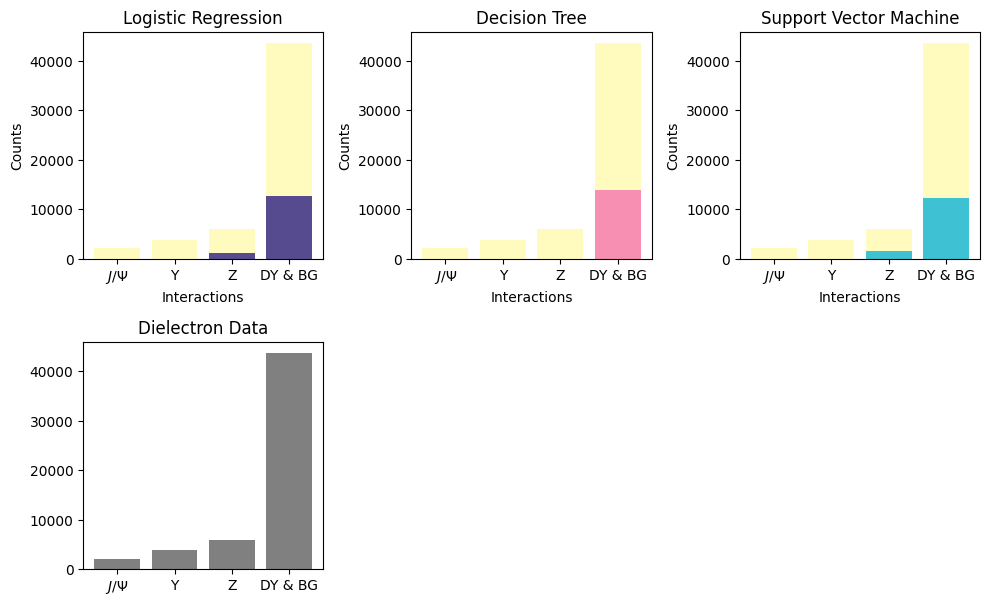

In [80]:
events_count = elec_pos.groupby(['interaction'])['Event'].count().sort_values()

events_count_pred_LR = pd.Series(y_predict_LR).value_counts().sort_values()
events_count_pred_LR.index = ['Z','DY & BG']

events_count_pred_DT = pd.Series(y_predict_DT).value_counts().sort_values()
events_count_pred_DT.index = ['DY & BG']

events_count_pred_SVM = pd.Series(y_predict_SVM).value_counts().sort_values()
events_count_pred_SVM.index = ['Z','DY & BG']

plt.figure(figsize = (10,9))
plt.subplot(3,3,1)
plt.bar(x = events_count.index, height = events_count, color = '#fffbbe') 
plt.subplot(3,3,1)
plt.bar(x = events_count_pred_LR.index, height = events_count_pred_LR, color = '#574b90') 
plt.xlabel('Interactions')
plt.ylabel('Counts')
plt.title('Logistic Regression')

plt.subplot(3,3,2)
plt.bar(x = events_count.index, height = events_count, color = '#fffbbe') 
plt.subplot(3,3,2)
plt.bar(x = events_count_pred_DT.index, height = events_count_pred_DT, color = '#f78fb3') 
plt.xlabel('Interactions')
plt.ylabel('Counts')
plt.title('Decision Tree')

plt.subplot(3,3,3)
plt.bar(x = events_count.index, height = events_count, color = '#fffbbe') 
plt.subplot(3,3,3)
plt.bar(x = events_count_pred_SVM.index, height = events_count_pred_SVM, color = '#3ec1d3') 
plt.xlabel('Interactions')
plt.ylabel('Counts')
plt.title('Support Vector Machine')

plt.subplot(3,3,4)
plt.bar(x = events_count.index, height = events_count, color = 'gray') 
plt.title('Dielectron Data')

plt.tight_layout()
plt.savefig('models_dielectron.png')
plt.show()

## Evaluating the models using other dataset<a id="field"></a>

In [82]:
data_2 = pd.read_csv(r"dimuon.csv")

In [83]:
data_2.head()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,GT,146511,25343052,7.33390,2.060420,5.88580,-3.85836,6.23602,-0.584812,1.234060,-1,5.20755,-1.55016,-1.819760,4.62525,2.39050,1.414110,-2.276360,1,11.82820
1,GG,146511,25341481,18.46720,8.033950,-3.94072,-16.15410,8.94839,-1.352990,-0.456026,-1,10.72950,6.29476,-2.524410,-8.31349,6.78208,-1.032390,-0.381397,1,2.58406
2,GG,146511,25390065,7.70222,-0.248771,4.08338,6.52511,4.09095,1.246340,1.631640,-1,6.90202,-3.02439,3.751290,4.94041,4.81862,0.899132,2.249320,1,3.11929
3,GG,146511,25391068,6.59462,5.246510,2.16082,3.35900,5.67407,0.561945,0.390686,1,7.43461,-5.06069,4.408010,3.19704,6.71127,0.459977,2.425020,-1,10.51920
4,GG,146511,25489877,45.77350,8.864420,1.28931,-44.88830,8.95770,-2.314620,0.144435,-1,9.27485,-3.64696,-0.276874,8.52260,3.65745,1.582250,-3.065820,1,40.98300


In [84]:
data_2.isna().sum()/data.shape[0]*100

Type     0.0
Run      0.0
Event    0.0
E1       0.0
px1      0.0
py1      0.0
pz1      0.0
pt1      0.0
eta1     0.0
phi1     0.0
Q1       0.0
E2       0.0
px2      0.0
py2      0.0
pz2      0.0
pt2      0.0
eta2     0.0
phi2     0.0
Q2       0.0
M        0.0
dtype: float64

In [85]:
data_2.columns = data_2.columns.str.replace(' ', '')
data_2.keys()

Index(['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'M'],
      dtype='object')

In [86]:
# Definig the categorical functions that will be used:

# returns the category of the enteraction based on the potential source event:
def categories_of_enteractions(df): 

    if (df['M'] >= np.exp(1)) & (df['M'] <= np.exp(1.257)):
        return '$J/\Psi$'
    elif (df['M'] > np.exp(2.150)) & (df['M'] <= np.exp(2.4)):
        return 'Y'
    elif (df['M'] > np.exp(4.422)) & (df['M'] <= np.exp(4.605)):
        return 'Z'
    else:
        return 'DY & BG'

# returns the part of the detector where the ee where detected:
def categories_of_cms_part(df):
    if ((df['eta1'] > 1.497) & (df['eta2'] > 1.497)) | ((df['eta1'] < -1.497) & (df['eta2'] < -1.497)):
        return 'Barrel'
    elif ((df['eta1'] < 1.497) & (df['eta2'] < 1.497)) | ((df['eta1'] > -1.497) & (df['eta2'] > -1.497)):
        return 'Endcaps'
    else:
        return 'Both'

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\4112738047.py:7: SyntaxWarning: invalid escape sequence '\P'
  return '$J/\Psi$'


In [87]:
# Adding interactions column to the data:
data_2['interaction'] = data_2.apply(categories_of_enteractions, axis = 1) # potential source interaction

In [88]:
data_2.head()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,...,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,interaction
0,GT,146511,25343052,7.33390,2.060420,5.88580,-3.85836,6.23602,-0.584812,1.234060,...,5.20755,-1.55016,-1.819760,4.62525,2.39050,1.414110,-2.276360,1,11.82820,DY & BG
1,GG,146511,25341481,18.46720,8.033950,-3.94072,-16.15410,8.94839,-1.352990,-0.456026,...,10.72950,6.29476,-2.524410,-8.31349,6.78208,-1.032390,-0.381397,1,2.58406,DY & BG
2,GG,146511,25390065,7.70222,-0.248771,4.08338,6.52511,4.09095,1.246340,1.631640,...,6.90202,-3.02439,3.751290,4.94041,4.81862,0.899132,2.249320,1,3.11929,$J/\Psi$
3,GG,146511,25391068,6.59462,5.246510,2.16082,3.35900,5.67407,0.561945,0.390686,...,7.43461,-5.06069,4.408010,3.19704,6.71127,0.459977,2.425020,-1,10.51920,Y
4,GG,146511,25489877,45.77350,8.864420,1.28931,-44.88830,8.95770,-2.314620,0.144435,...,9.27485,-3.64696,-0.276874,8.52260,3.65745,1.582250,-3.065820,1,40.98300,DY & BG


In [89]:
# Categorizing the Events According to their Dielectrons Charge:
elec_elec = data_2[(data_2['Q1'] == -1) & (data_2['Q2'] == -1)]
elec_pos_2 = data_2[((data_2['Q1'] == -1) & (data_2['Q2'] == 1)) | ((data_2['Q1'] == 1) & (data_2['Q2'] == -1))] #----- These are the events of interest!
pos_pos = data_2[(data_2['Q1'] == 1) & (data_2['Q2'] == 1)]

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_19352\3324407092.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log(M)$')


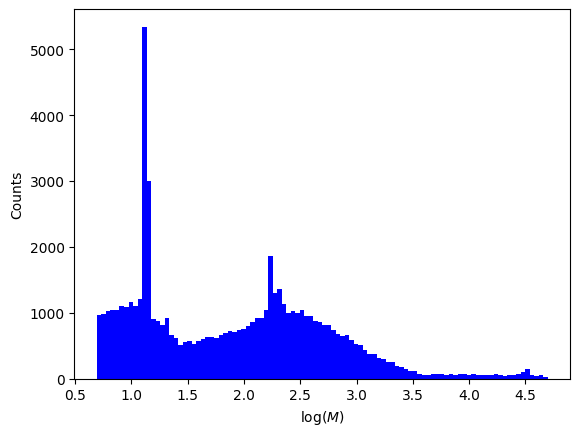

In [90]:
# To open Interactive Window
#%matplotlib qt 

#To open Inline Window
%matplotlib inline 

plt.xlabel('$\log(M)$')
plt.ylabel('Counts')

plt.hist(np.log(elec_pos_2['M']), bins = 100, color = 'blue'); #darkslategrey
mplcursors.cursor(hover=True); # To get the information while hovering over the histogram

plt.show()

In [91]:
X_Muon = elec_pos_2[features].to_numpy()
y_correct = encoder.fit_transform(elec_pos_2[target])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
y_correct

array([1, 1, 0, ..., 1, 1, 1])

In [93]:
y_predict_LR = lr.predict(X_Muon)
y_predict_DT = onevsrest.predict(X_Muon)
y_predict_SVM = SVM_model.predict(X_Muon)

In [94]:
# Accuracy of the models
accuracy_LR = accuracy_score(y_correct, y_predict_LR)
accuracy_DT = accuracy_score(y_correct, y_predict_DT)
accuracy_SVM = accuracy_score(y_correct, y_predict_SVM)
print(f'The accuracy of Logistic Regression model is : {accuracy_LR: .2f}')
print(f'The accuracy of Decision Tree model is : {accuracy_DT: .2f}')
print(f'The Using Support Vector Machine model is : {accuracy_SVM: .2f}')

The accuracy of Logistic Regression model is :  0.04
The accuracy of Decision Tree model is :  0.66
The Using Support Vector Machine model is :  0.62


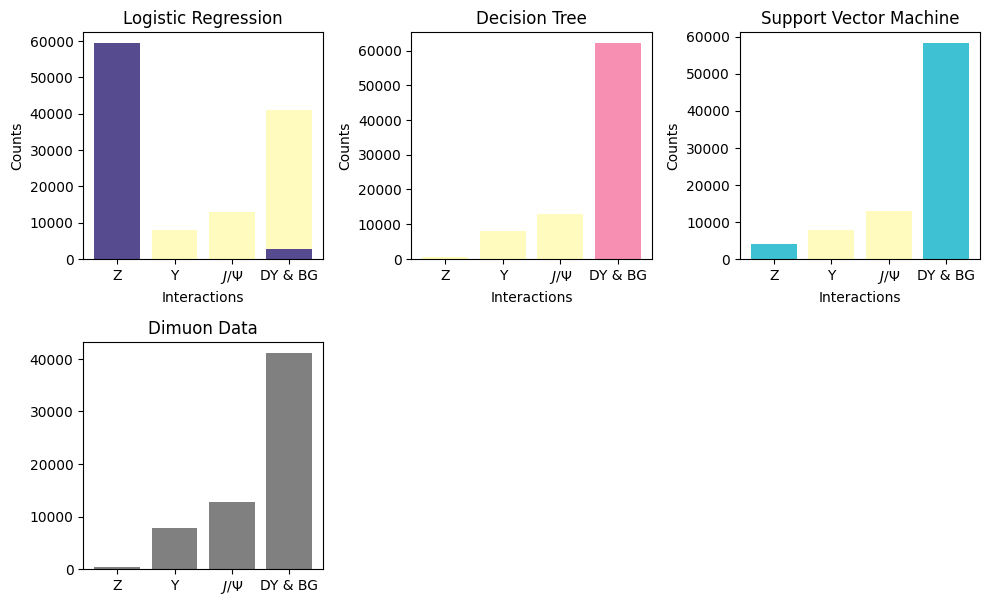

In [95]:
events_count = elec_pos_2.groupby(['interaction'])['Event'].count().sort_values()

events_count_pred_LR = pd.Series(y_predict_LR).value_counts().sort_values()
events_count_pred_LR.index = ['DY & BG','Z']

events_count_pred_DT = pd.Series(y_predict_DT).value_counts().sort_values()
events_count_pred_DT.index = ['DY & BG']

events_count_pred_SVM = pd.Series(y_predict_SVM).value_counts().sort_values()
events_count_pred_SVM.index = ['Z','DY & BG']

plt.figure(figsize = (10,9))
plt.subplot(3,3,1)
plt.bar(x = events_count.index, height = events_count, color = '#fffbbe') 
plt.subplot(3,3,1)
plt.bar(x = events_count_pred_LR.index, height = events_count_pred_LR, color = '#574b90') 
plt.xlabel('Interactions')
plt.ylabel('Counts')
plt.title('Logistic Regression')

plt.subplot(3,3,2)
plt.bar(x = events_count.index, height = events_count, color = '#fffbbe') 
plt.subplot(3,3,2)
plt.bar(x = events_count_pred_DT.index, height = events_count_pred_DT, color = '#f78fb3') 
plt.xlabel('Interactions')
plt.ylabel('Counts')
plt.title('Decision Tree')

plt.subplot(3,3,3)
plt.bar(x = events_count.index, height = events_count, color = '#fffbbe') 
#plt.xticks(events_count.index, ['$J/\\Psi$', 'DY & BG', 'Y', 'Z'])
plt.subplot(3,3,3)
plt.bar(x = events_count_pred_SVM.index, height = events_count_pred_SVM, color = '#3ec1d3') 
plt.xlabel('Interactions')
plt.ylabel('Counts')
plt.title('Support Vector Machine')

plt.subplot(3,3,4)
plt.bar(x = events_count.index, height = events_count, color = 'gray') 
plt.title('Dimuon Data')

plt.tight_layout()
plt.savefig('models_dimuon.png')
plt.show()